In [33]:
import keras
# IMDB 리뷰 데이터셋 
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.imdb.load_data(num_words=200)

In [34]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [35]:
print(len(train_input[0]), len(train_input[1]), len(train_input[2]))

218 189 141


In [36]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [37]:
train_target[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [38]:
# 훈련세트, 검증세트 
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [39]:
# 단어 갯수의 분포로 가장 많이 분포가 되어 있는 단어 갯수를 파악
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(f"평균:{np.mean(lengths)}, 중앙값:{np.median(lengths)}, 최대:{np.max(lengths)}, 최소:{np.min(lengths)}")

평균:239.00925, 중앙값:178.0, 최대:1854, 최소:11


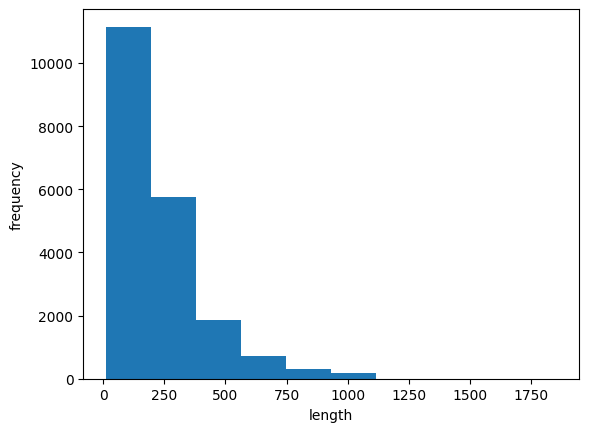

In [40]:
import matplotlib.pyplot as plt

plt.hist(lengths) # 히스토그램 그리기 : 수치의 빈도를 가지고 그래프를 그릴때 
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [41]:
# 패딩 처리 - 학습 입력 데이터는 갯수가 동일!, 문장은 갯수가 동일하지 않다 - 동일하게 일정 갯수만큼 자른다.
# 어떤 문장은 기준보다 작을 수 있으므로 0으로 채워서 길이를 맞춰준다. 

from keras.preprocessing.sequence import pad_sequences

In [42]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [43]:
print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


In [44]:
print(train_seq[0])
print(train_seq[0][-10:])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[  6   2  46   7  14  20  10  10   2 158]


In [45]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
         2,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14,   2,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94,   2,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2,   2,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [46]:
# 원핫인코딩 처리 
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [47]:
print(train_oh.shape, val_oh.shape)

(20000, 100, 200) (5000, 100, 200)


In [48]:
train_oh[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
train_oh.nbytes

3200000000

In [ ]:
# 순환신경망 만들기 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8)) # activation='tanh' 생략되어 있음
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# 옵티마이저, 손실함수, 측정지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [53]:
print(val_oh.shape, val_target.shape)

(5000, 100, 200) (5000,)


In [54]:
hist = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5627 - loss: 0.6796 - val_accuracy: 0.6958 - val_loss: 0.5938
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6946 - loss: 0.5911 - val_accuracy: 0.7134 - val_loss: 0.5701
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7111 - loss: 0.5693 - val_accuracy: 0.7110 - val_loss: 0.5702
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7156 - loss: 0.5637 - val_accuracy: 0.7138 - val_loss: 0.5628
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7184 - loss: 0.5610 - val_accuracy: 0.7250 - val_loss: 0.5514
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7272 - loss: 0.5517 - val_accuracy: 0.7210 - val_loss: 0.5531
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7283 - loss: 0.5453 - val_accuracy: 0.7258 - val_loss: 0.5559
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7350 - loss: 0.5360 - val_accu

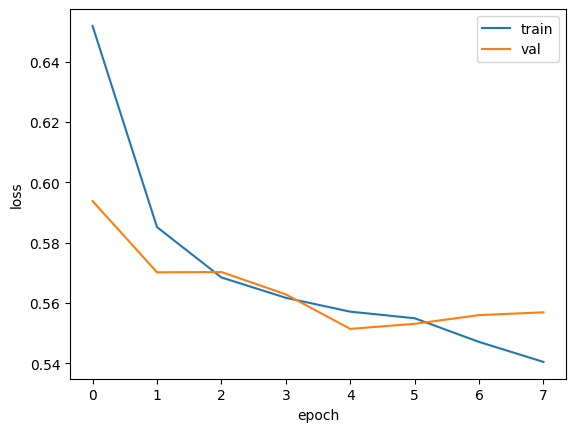

In [55]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [56]:
# 단어 임베딩, 지정된 크기 만큼의 실수 밀집 벡터로 변환, 벡터는 유의미한 데이터, 학습을 반복하면서 조정.(경사하강법)
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=500)

# 훈련세트, 검증세트
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [57]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [58]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500, 16))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# 옵티마이저, 손실함수, 측정지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [62]:
hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5174 - loss: 0.6915 - val_accuracy: 0.5826 - val_loss: 0.6646
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6498 - loss: 0.6254 - val_accuracy: 0.6406 - val_loss: 0.6314
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6717 - loss: 0.6027 - val_accuracy: 0.6742 - val_loss: 0.6032
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6732 - loss: 0.5923 - val_accuracy: 0.6668 - val_loss: 0.6107
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7269 - loss: 0.5439 - val_accuracy: 0.7090 - val_loss: 0.5756
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7180 - loss: 0.5512 - val_accuracy: 0.6410 - val_loss: 0.6253
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7090 - loss: 0.5618 - val_accuracy: 0.6526 - val_loss: 0.6220
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7126 - loss: 0.5527 - val_accu